In [ ]:
# 1. Import Libraries
# --------------------

import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.neural_network import MLPClassifier

In [ ]:
#Run this code only if you use google colab
from google.colab import files
uploaded = files.upload()

Saving WA_Fn-UseC_-Telco-Customer-Churn.csv to WA_Fn-UseC_-Telco-Customer-Churn.csv


In [ ]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [ ]:
df.dtypes

,0
customerID,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


In [ ]:
# Convert TotalCharges to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df = df.dropna()

# Drop customerID
df = df.drop('customerID', axis=1)

# Convert Yes/No to binary
binary_cols = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']
for col in binary_cols:
    df[col] = df[col].map({'Yes':1, 'No':0})

# One-hot encode categorical columns
df = pd.get_dummies(df, drop_first=True)

In [ ]:
X = df.drop('Churn', axis=1)
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Logistic Regression

In [ ]:
# Logistic Regression
log_model = LogisticRegression(max_iter=500)
log_model.fit(X_train_scaled, y_train)

y_pred_log = log_model.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))

Accuracy: 0.7874911158493249
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.62      0.52      0.56       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407



#KNN

In [ ]:
# K-Nearest Neighbors
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

y_pred_knn = knn.predict(X_test_scaled)
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

KNN Accuracy: 0.7526652452025586
              precision    recall  f1-score   support

           0       0.83      0.84      0.83      1033
           1       0.54      0.51      0.52       374

    accuracy                           0.75      1407
   macro avg       0.68      0.67      0.68      1407
weighted avg       0.75      0.75      0.75      1407



#Neural Network

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# Create neural network model similar to Keras version
mlp = MLPClassifier(
    hidden_layer_sizes=(32, 16), # Two hidden layers with 32 and 16 neurons
    activation='relu',
    solver='adam',
    max_iter=200, # like epochs
    random_state=42,
)
# Train the model
mlp.fit(X_train_scaled, y_train)

# Predictions
nn_pred = mlp.predict(X_test_scaled)

# Accuracy
print("Neural Network Accuracy:", accuracy_score(y_test, nn_pred))
print(classification_report(y_test, nn_pred))



Neural Network Accuracy: 0.7647476901208244
              precision    recall  f1-score   support

           0       0.84      0.84      0.84      1033
           1       0.56      0.55      0.55       374

    accuracy                           0.76      1407
   macro avg       0.70      0.69      0.70      1407
weighted avg       0.76      0.76      0.76      1407



Neural Network Accuracy: 0.7924662402274343


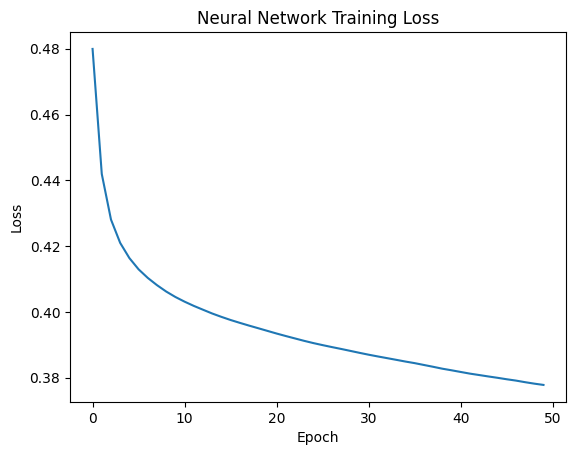

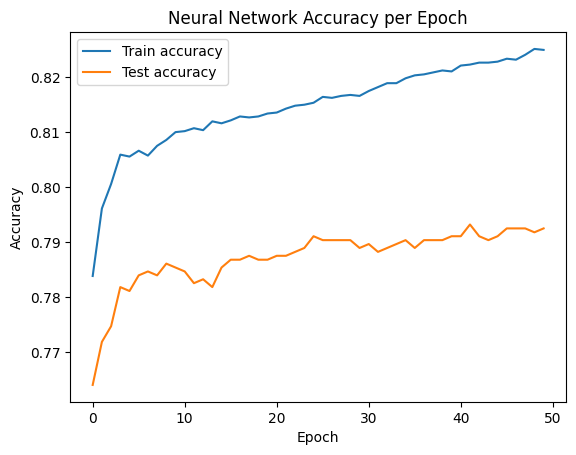

In [ ]:
# Imports for Option 2
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt # For plotting if desired

epochs = 50 # Total number of training cycles

# Initialize the MLP classifier for incremental training
mlp = MLPClassifier(
    hidden_layer_sizes=(32, 16),
    activation='relu',
    solver='adam',
    max_iter=1, # train 1 epoch at a time
    warm_start=True, # keep weights between .fit calls
    random_state=42
)

train_acc = []
test_acc = []
losses = []

# Loop to train 1 epoch at a time and record performance
for i in range(epochs):
    mlp.fit(X_train_scaled, y_train)          # one more epoch
    losses.append(mlp.loss_)                  # current loss
    train_acc.append(mlp.score(X_train_scaled, y_train))
    test_acc.append(mlp.score(X_test_scaled, y_test))

# Final predictions and accuracy
nn_pred = mlp.predict(X_test_scaled)
print("Neural Network Accuracy:", accuracy_score(y_test, nn_pred))

# ---- Plot training loss ----
plt.figure()
plt.plot(losses)
plt.title("Neural Network Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

# ---- Plot train vs test accuracy ----
plt.figure()
plt.plot(train_acc, label="Train accuracy")
plt.plot(test_acc, label="Test accuracy")
plt.title("Neural Network Accuracy per Epoch")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()



#Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# 1. Initialize the Decision Tree model
# Setting random_state=42 ensures reproducibility of the tree structure
dt_model = DecisionTreeClassifier(random_state=42)

# 2. Train the model (Fit on Training Data)
# The model learns the decision rules from X_train_scaled and y_train
dt_model.fit(X_train_scaled, y_train)

# 3. Test the model (Predict on Testing Data)
# The trained model makes predictions on the unseen testing data
y_pred_dt = dt_model.predict(X_test_scaled)

# 4. Evaluate the model
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt))

Decision Tree Accuracy: 0.7270788912579957

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.80      0.81      1033
           1       0.49      0.54      0.51       374

    accuracy                           0.73      1407
   macro avg       0.66      0.67      0.66      1407
weighted avg       0.74      0.73      0.73      1407



#Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# 1. Initialize the Random Forest model
# n_estimators=100 means it will build 100 decision trees
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# 2. Train the model (Fit on Training Data)
rf_model.fit(X_train_scaled, y_train)

# 3. Test the model (Predict on Testing Data)
y_pred_rf = rf_model.predict(X_test_scaled)

# 4. Evaluate the model
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.7853589196872779

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.91      0.86      1033
           1       0.63      0.45      0.53       374

    accuracy                           0.79      1407
   macro avg       0.73      0.68      0.70      1407
weighted avg       0.77      0.79      0.77      1407



#Confusion Matrix for Each Model

In [ ]:
from sklearn.metrics import confusion_matrix

def print_conf_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    print(f"\nConfusion Matrix for {model_name}:")
    print(cm)

print("\n--- Confusion Matrices ---")
print_conf_matrix(y_test, y_pred_log, "Logistic Regression")
print_conf_matrix(y_test, y_pred_knn, "K-Nearest Neighbors")
print_conf_matrix(y_test, y_pred_dt, "Decision Tree")
print_conf_matrix(y_test, nn_pred, "Neural Network (MLP)")
print_conf_matrix(y_test, y_pred_rf, "Random Forest")



--- Confusion Matrices ---

Confusion Matrix for Logistic Regression:
[[915 118]
 [181 193]]

Confusion Matrix for K-Nearest Neighbors:
[[869 164]
 [184 190]]

Confusion Matrix for Decision Tree:
[[822 211]
 [173 201]]

Confusion Matrix for Neural Network (MLP):
[[911 122]
 [170 204]]

Confusion Matrix for Random Forest:
[[935  98]
 [204 170]]



--- Random Forest Feature Importance ---


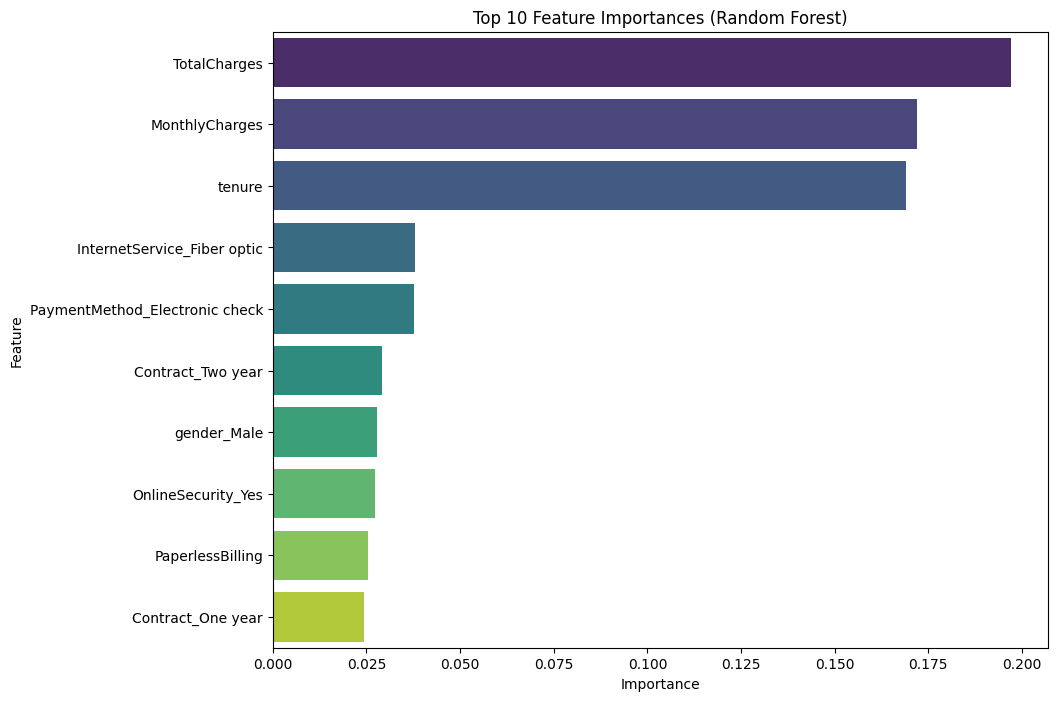

In [ ]:
# Feature Importance is only available for tree-based models (Decision Tree, Random Forest)
import numpy as np
import seaborn as sns

print("\n--- Random Forest Feature Importance ---")

# Get feature importances from the trained Random Forest model
importances = rf_model.feature_importances_

# Get the names of the features (assuming X_train is a DataFrame before scaling)
feature_names = X_train.columns

# Combine names and importance scores
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importance
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10), palette='viridis')
plt.title('Top 10 Feature Importances (Random Forest)')
plt.show()

Receiver Operating Characteristic (ROC) Curves and Area Under the Curve (AUC) Comparison Across All Models

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

def plot_roc(model, X_test, y_test, model_name):
    # Get predicted probabilities for positive class
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)[:, 1]
    else:
        y_prob = model.decision_function(X_test)

    # ROC values
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)

    # Plot ROC
    plt.figure(figsize=(6, 5))
    plt.plot(fpr, tpr, label=f"{model_name} (AUC = {roc_auc:.3f})")
    plt.plot([0, 1], [0, 1], 'k--')  # diagonal reference line
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC Curve - {model_name}")
    plt.legend()
    plt.grid(True)
    plt.show()

    return roc_auc


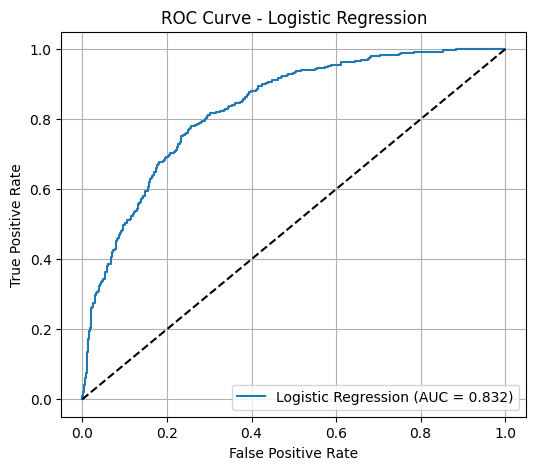

AUC (Logistic Regression): 0.8319235288940887


In [ ]:
auc_log = plot_roc(log_model, X_test_scaled, y_test, "Logistic Regression")
print("AUC (Logistic Regression):", auc_log)


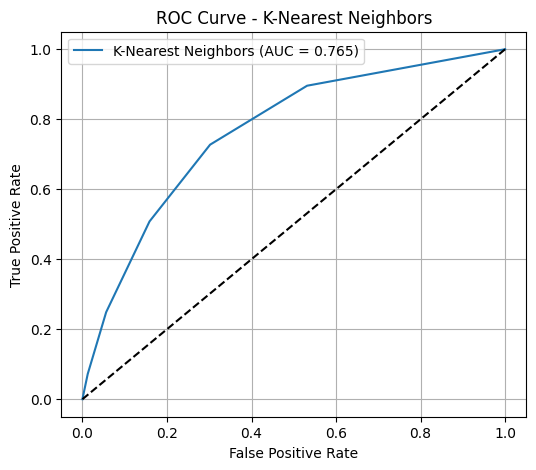

AUC (KNN): 0.7650475485450715


In [ ]:
auc_knn = plot_roc(knn, X_test_scaled, y_test, "K-Nearest Neighbors")
print("AUC (KNN):", auc_knn)


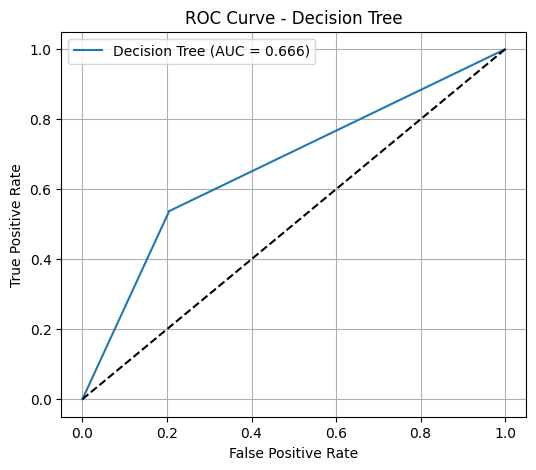

AUC (Decision Tree): 0.6660898892690932


In [ ]:
auc_dt = plot_roc(dt_model, X_test_scaled, y_test, "Decision Tree")
print("AUC (Decision Tree):", auc_dt)


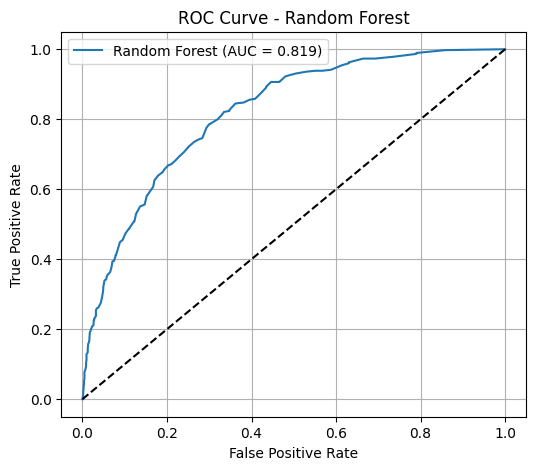

AUC (Random Forest): 0.8191602259138276


In [ ]:
auc_rf = plot_roc(rf_model, X_test_scaled, y_test, "Random Forest")
print("AUC (Random Forest):", auc_rf)


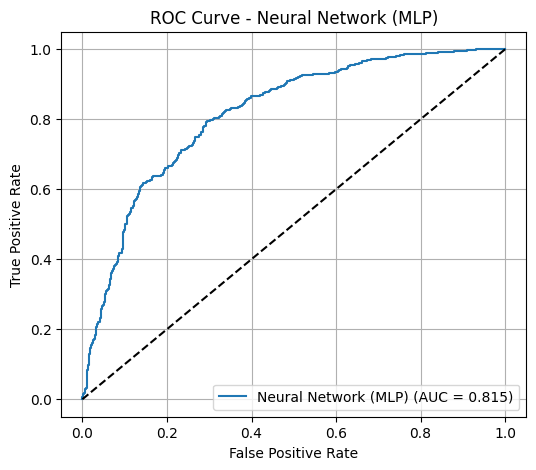

AUC (Neural Network): 0.815184473859948


In [ ]:
auc_nn = plot_roc(mlp, X_test_scaled, y_test, "Neural Network (MLP)")
print("AUC (Neural Network):", auc_nn)
